In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt
import numpy as np

# Train / Test

## Params

In [2]:
le_net = LeNet()

# Can use any network with ten input and two output nodes here
tail_net = nn.Linear(20, 2)

nb_epochs = 25
n_cv = 10 
n_cv_weight = 5

## Hyperparam opt the weight 
- Can skip and use result if using same architecture

In [4]:
weights = np.linspace(0.1, 1, 10)

In [5]:
weight_test_accuracies = np.zeros((n_cv_weight, len(weights)))

In [6]:
def hyperparam_opt(weights, n_cv_weight=5):
    for j, weight in enumerate(weights): 
    # 5 fold cross validate here 
        for i in range(n_cv_weight):
            dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
            siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     target=tail_net, 
                                     weight_aux=weight)
            trainer = Trainer(nb_epochs=nb_epochs)
            trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=False)
            acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
            weight_test_accuracies[i,j] = acc_test
    avg_weight_test_accuracies = np.mean(weight_test_accuracies, axis=0)
    best_weight = weights[np.argmax(avg_weight_test_accuracies)]
    return best_weight

In [7]:
#best_weight = hyperparam_opt(weights, n_cv_weight=5)

In [8]:
# keep best weight
#best_weight

In [3]:
weight_aux = 0.8

In [4]:
train_losses = []
train_accuracies = []
validation_accuracies = []
test_accuracies = []

In [5]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     argmax=False,
                                     strategy="sum",
                                     target=tail_net, 
                                     weight_aux=weight_aux)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies.append(acc_test)

# Epoch 1/25:	 loss=2.28	 loss_val=0.59	 acc_val=68.3
# Epoch 2/25:	 loss=1.38	 loss_val=0.51	 acc_val=74.11
# Epoch 3/25:	 loss=0.88	 loss_val=0.38	 acc_val=80.8
# Epoch 4/25:	 loss=0.65	 loss_val=0.33	 acc_val=86.61
# Epoch 5/25:	 loss=0.55	 loss_val=0.31	 acc_val=85.71
# Epoch 6/25:	 loss=0.47	 loss_val=0.32	 acc_val=86.61
# Epoch 7/25:	 loss=0.39	 loss_val=0.28	 acc_val=87.95
# Epoch 8/25:	 loss=0.34	 loss_val=0.27	 acc_val=89.29
# Epoch 9/25:	 loss=0.31	 loss_val=0.31	 acc_val=87.5
# Epoch 10/25:	 loss=0.26	 loss_val=0.26	 acc_val=88.84
# Epoch 11/25:	 loss=0.22	 loss_val=0.33	 acc_val=87.05
# Epoch 12/25:	 loss=0.19	 loss_val=0.36	 acc_val=86.16
# Epoch 13/25:	 loss=0.16	 loss_val=0.3	 acc_val=89.73
# Epoch 14/25:	 loss=0.14	 loss_val=0.28	 acc_val=90.18
# Epoch 15/25:	 loss=0.1	 loss_val=0.29	 acc_val=89.73
# Epoch 16/25:	 loss=0.08	 loss_val=0.33	 acc_val=89.73
# Epoch 17/25:	 loss=0.06	 loss_val=0.32	 acc_val=90.18
# Epoch 18/25:	 loss=0.05	 loss_val=0.31	 acc_val=92.41
# Epoc

# Epoch 22/25:	 loss=0.0	 loss_val=0.45	 acc_val=89.29
# Epoch 23/25:	 loss=0.0	 loss_val=0.46	 acc_val=89.29
# Epoch 24/25:	 loss=0.0	 loss_val=0.46	 acc_val=89.29
# Epoch 25/25:	 loss=0.0	 loss_val=0.47	 acc_val=89.29
loss_test=0.57	 acc_test=89.84
# Epoch 1/25:	 loss=0.72	 loss_val=0.54	 acc_val=85.71
# Epoch 2/25:	 loss=0.28	 loss_val=0.6	 acc_val=84.82
# Epoch 3/25:	 loss=0.15	 loss_val=0.43	 acc_val=87.5
# Epoch 4/25:	 loss=0.1	 loss_val=0.42	 acc_val=88.39
# Epoch 5/25:	 loss=0.07	 loss_val=0.45	 acc_val=87.95
# Epoch 6/25:	 loss=0.05	 loss_val=0.43	 acc_val=87.95
# Epoch 7/25:	 loss=0.04	 loss_val=0.49	 acc_val=87.95
# Epoch 8/25:	 loss=0.03	 loss_val=0.49	 acc_val=88.39
# Epoch 9/25:	 loss=0.02	 loss_val=0.49	 acc_val=88.84
# Epoch 10/25:	 loss=0.02	 loss_val=0.5	 acc_val=88.39
# Epoch 11/25:	 loss=0.01	 loss_val=0.51	 acc_val=89.29
# Epoch 12/25:	 loss=0.01	 loss_val=0.52	 acc_val=88.84
# Epoch 13/25:	 loss=0.01	 loss_val=0.54	 acc_val=88.39
# Epoch 14/25:	 loss=0.01	 loss_va

In [6]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)


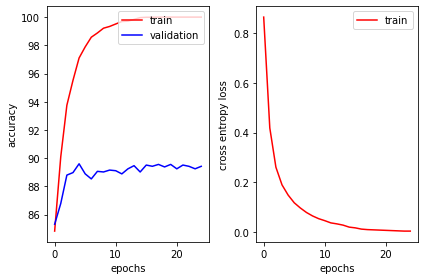

In [7]:
from src.utils import plot_training_epochs 
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies,
                          validation_accuracies)

In [8]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

avg test acc 89.414
stdev test acc 1.620408590448719
